In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
matplotlib inline

In [55]:
#data = pd.read_html('https://www.athletic.net/CrossCountry/Division/List.aspx?DivID=65067')

In [56]:
import requests

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get("https://www.athletic.net/CrossCountry/Division/List.aspx?DivID=65066", headers=header)

dfs = pd.read_html(r.text)

In [57]:
df = pd.DataFrame(dfs[0])

In [58]:
df.head()

,0,1,2,3,4,5,6,7,8
0,NaN,NaN,NaN,Athlete,Time,ST,Team,Date,Meet
1,NaN,1.0,11.0,Evan Stevens,15:38.4PR,MO,Webb City,Sep 17,Missouri Southern Stampede
2,NaN,2.0,12.0,Josh Allison,15:50.6,MO,Hillsboro,Sep 2,First Capitol XC Meet
3,NaN,3.0,10.0,Liam Adair,15:50.9PR,MO,Smithville,Sep 17,Missouri Southern Stampede
4,NaN,4.0,11.0,Isaac Rivera,15:56.4PR,MO,Lincoln College Prep,Sep 1,Greg Wilson Classic


In [59]:
df.drop(axis=1, columns=[0], inplace=True)

In [60]:

df

,1,2,3,4,5,6,7,8
0,NaN,NaN,Athlete,Time,ST,Team,Date,Meet
1,1.0,11.0,Evan Stevens,15:38.4PR,MO,Webb City,Sep 17,Missouri Southern Stampede
2,2.0,12.0,Josh Allison,15:50.6,MO,Hillsboro,Sep 2,First Capitol XC Meet
3,3.0,10.0,Liam Adair,15:50.9PR,MO,Smithville,Sep 17,Missouri Southern Stampede
4,4.0,11.0,Isaac Rivera,15:56.4PR,MO,Lincoln College Prep,Sep 1,Greg Wilson Classic
...,...,...,...,...,...,...,...,...
96,96.0,10.0,Tanner Jenks,18:20.5PR,MO,Platte County,Sep 3,Tim Nixon Invitational
97,NaN,10.0,Thomas Pratz,18:20.5PR,MO,Rolla,Sep 10,Lebanon Invitational
98,98.0,11.0,Joshua Schnurbusch,18:21.3PR,MO,Notre Dame (Cape Girardeau),Sep 17,Cape Central XC Invitational
99,99.0,11.0,James Warner,18:22.4,MO,St. Charles,Sep 2,First Capitol XC Meet


In [61]:
df[4].unique()

array(['Time', '15:38.4PR', '15:50.6', '15:50.9PR', '15:56.4PR',
       '16:02.9PR', '16:11.7PR', '16:15.0', '16:26.1', '16:26.3PR',
       '16:33.7', '16:35.2PR', '16:36.0PR', '16:41.0', '16:43.5',
       '16:46.8', '16:46.9PR', '16:48.0PR', '16:49.4PR', '16:49.6PR',
       '16:54.4PR', '16:55.2PR', '17:02.5PR', '17:03.2PR', '17:05.3',
       '17:06.9', '17:07.7', '17:09.1', '17:11.3', '17:12.4PR',
       '17:12.6PR', '17:14.0', '17:17.3PR', '17:19.1', '17:22.6PR',
       '17:23.5', '17:25.4', '17:28.5PR', '17:30.2PR', '17:31.5PR',
       '17:32.4PR', '17:33.6PR', '17:34.6PR', '17:36.3', '17:36.7PR',
       '17:37.3PR', '17:37.9PR', '17:38.3PR', '17:38.8PR', '17:42.0PR',
       '17:43.7', '17:44.2PR', '17:47.1', '17:48.2', '17:49.5PR',
       '17:51.3', '17:52.1PR', '17:52.8', '17:54.9', '17:55.3PR',
       '17:55.7', '17:56.2PR', '17:56.8PR', '17:58.1', '17:59.7PR',
       '18:00.4PR', '18:00.4', '18:00.5', '18:02.9PR', '18:04.2',
       '18:04.3', '18:04.3PR', '18:04.8PR', '18:05.7'

In [62]:
df[6].unique()

array(['Team', 'Webb City', 'Hillsboro', 'Smithville',
       'Lincoln College Prep', 'St. Charles West', 'Rolla',
       'Platte County', 'Central (Cape Girardeau)', 'Festus', 'Bolivar',
       'West Plains', 'Monett', 'Farmington', 'Marshfield',
       'Ft. Zumwalt North', 'St. Charles', 'Windsor (Imperial)',
       'Notre Dame (Cape Girardeau)', 'Union', 'Parkway Central',
       'Camdenton', 'Willard', 'Ft. Zumwalt East', 'North County',
       'Warrensburg', 'Pacific', 'Whitfield', 'Desoto', 'Kearney',
       'Mexico', 'Sullivan', 'St. Vincent', 'Hannibal', 'Warrenton',
       'Carl Junction', 'William Chrisman'], dtype=object)

In [63]:
df[4].unique()

array(['Time', '15:38.4PR', '15:50.6', '15:50.9PR', '15:56.4PR',
       '16:02.9PR', '16:11.7PR', '16:15.0', '16:26.1', '16:26.3PR',
       '16:33.7', '16:35.2PR', '16:36.0PR', '16:41.0', '16:43.5',
       '16:46.8', '16:46.9PR', '16:48.0PR', '16:49.4PR', '16:49.6PR',
       '16:54.4PR', '16:55.2PR', '17:02.5PR', '17:03.2PR', '17:05.3',
       '17:06.9', '17:07.7', '17:09.1', '17:11.3', '17:12.4PR',
       '17:12.6PR', '17:14.0', '17:17.3PR', '17:19.1', '17:22.6PR',
       '17:23.5', '17:25.4', '17:28.5PR', '17:30.2PR', '17:31.5PR',
       '17:32.4PR', '17:33.6PR', '17:34.6PR', '17:36.3', '17:36.7PR',
       '17:37.3PR', '17:37.9PR', '17:38.3PR', '17:38.8PR', '17:42.0PR',
       '17:43.7', '17:44.2PR', '17:47.1', '17:48.2', '17:49.5PR',
       '17:51.3', '17:52.1PR', '17:52.8', '17:54.9', '17:55.3PR',
       '17:55.7', '17:56.2PR', '17:56.8PR', '17:58.1', '17:59.7PR',
       '18:00.4PR', '18:00.4', '18:00.5', '18:02.9PR', '18:04.2',
       '18:04.3', '18:04.3PR', '18:04.8PR', '18:05.7'

In [64]:
df[4] = df[4].map(lambda x: x.strip('PR'))

In [65]:
df[4].unique()

array(['Time', '15:38.4', '15:50.6', '15:50.9', '15:56.4', '16:02.9',
       '16:11.7', '16:15.0', '16:26.1', '16:26.3', '16:33.7', '16:35.2',
       '16:36.0', '16:41.0', '16:43.5', '16:46.8', '16:46.9', '16:48.0',
       '16:49.4', '16:49.6', '16:54.4', '16:55.2', '17:02.5', '17:03.2',
       '17:05.3', '17:06.9', '17:07.7', '17:09.1', '17:11.3', '17:12.4',
       '17:12.6', '17:14.0', '17:17.3', '17:19.1', '17:22.6', '17:23.5',
       '17:25.4', '17:28.5', '17:30.2', '17:31.5', '17:32.4', '17:33.6',
       '17:34.6', '17:36.3', '17:36.7', '17:37.3', '17:37.9', '17:38.3',
       '17:38.8', '17:42.0', '17:43.7', '17:44.2', '17:47.1', '17:48.2',
       '17:49.5', '17:51.3', '17:52.1', '17:52.8', '17:54.9', '17:55.3',
       '17:55.7', '17:56.2', '17:56.8', '17:58.1', '17:59.7', '18:00.4',
       '18:00.5', '18:02.9', '18:04.2', '18:04.3', '18:04.8', '18:05.7',
       '18:06.8', '18:07.4', '18:07.8', '18:08.0', '18:08.1', '18:08.3',
       '18:09.0', '18:09.6', '18:11.3', '18:11.4', '18

In [66]:
df

,1,2,3,4,5,6,7,8
0,NaN,NaN,Athlete,Time,ST,Team,Date,Meet
1,1.0,11.0,Evan Stevens,15:38.4,MO,Webb City,Sep 17,Missouri Southern Stampede
2,2.0,12.0,Josh Allison,15:50.6,MO,Hillsboro,Sep 2,First Capitol XC Meet
3,3.0,10.0,Liam Adair,15:50.9,MO,Smithville,Sep 17,Missouri Southern Stampede
4,4.0,11.0,Isaac Rivera,15:56.4,MO,Lincoln College Prep,Sep 1,Greg Wilson Classic
...,...,...,...,...,...,...,...,...
96,96.0,10.0,Tanner Jenks,18:20.5,MO,Platte County,Sep 3,Tim Nixon Invitational
97,NaN,10.0,Thomas Pratz,18:20.5,MO,Rolla,Sep 10,Lebanon Invitational
98,98.0,11.0,Joshua Schnurbusch,18:21.3,MO,Notre Dame (Cape Girardeau),Sep 17,Cape Central XC Invitational
99,99.0,11.0,James Warner,18:22.4,MO,St. Charles,Sep 2,First Capitol XC Meet


In [67]:
df.drop(axis=1, columns=[1], inplace=True)

In [68]:
df

,2,3,4,5,6,7,8
0,NaN,Athlete,Time,ST,Team,Date,Meet
1,11.0,Evan Stevens,15:38.4,MO,Webb City,Sep 17,Missouri Southern Stampede
2,12.0,Josh Allison,15:50.6,MO,Hillsboro,Sep 2,First Capitol XC Meet
3,10.0,Liam Adair,15:50.9,MO,Smithville,Sep 17,Missouri Southern Stampede
4,11.0,Isaac Rivera,15:56.4,MO,Lincoln College Prep,Sep 1,Greg Wilson Classic
...,...,...,...,...,...,...,...
96,10.0,Tanner Jenks,18:20.5,MO,Platte County,Sep 3,Tim Nixon Invitational
97,10.0,Thomas Pratz,18:20.5,MO,Rolla,Sep 10,Lebanon Invitational
98,11.0,Joshua Schnurbusch,18:21.3,MO,Notre Dame (Cape Girardeau),Sep 17,Cape Central XC Invitational
99,11.0,James Warner,18:22.4,MO,St. Charles,Sep 2,First Capitol XC Meet


In [69]:
df[6].unique()

array(['Team', 'Webb City', 'Hillsboro', 'Smithville',
       'Lincoln College Prep', 'St. Charles West', 'Rolla',
       'Platte County', 'Central (Cape Girardeau)', 'Festus', 'Bolivar',
       'West Plains', 'Monett', 'Farmington', 'Marshfield',
       'Ft. Zumwalt North', 'St. Charles', 'Windsor (Imperial)',
       'Notre Dame (Cape Girardeau)', 'Union', 'Parkway Central',
       'Camdenton', 'Willard', 'Ft. Zumwalt East', 'North County',
       'Warrensburg', 'Pacific', 'Whitfield', 'Desoto', 'Kearney',
       'Mexico', 'Sullivan', 'St. Vincent', 'Hannibal', 'Warrenton',
       'Carl Junction', 'William Chrisman'], dtype=object)

In [70]:
value_counts = df[6].value_counts()

In [71]:
value_counts

Hillsboro                      9
Smithville                     8
Festus                         6
West Plains                    6
Parkway Central                5
Ft. Zumwalt North              4
Webb City                      4
Farmington                     4
Notre Dame (Cape Girardeau)    4
Platte County                  4
Lincoln College Prep           4
St. Charles                    4
Bolivar                        3
Hannibal                       3
Warrenton                      2
Union                          2
Pacific                        2
Monett                         2
Kearney                        2
Warrensburg                    2
Central (Cape Girardeau)       2
Rolla                          2
St. Charles West               2
Ft. Zumwalt East               2
Carl Junction                  1
Sullivan                       1
St. Vincent                    1
Mexico                         1
Team                           1
Desoto                         1
Whitfield 

In [72]:
to_remove = value_counts[value_counts > 7].index

In [73]:
to_remove

Index(['Hillsboro', 'Smithville'], dtype='object')

In [74]:
#df = df[~df[6].isin(to_remove)]

In [75]:
df

,2,3,4,5,6,7,8
0,NaN,Athlete,Time,ST,Team,Date,Meet
1,11.0,Evan Stevens,15:38.4,MO,Webb City,Sep 17,Missouri Southern Stampede
2,12.0,Josh Allison,15:50.6,MO,Hillsboro,Sep 2,First Capitol XC Meet
3,10.0,Liam Adair,15:50.9,MO,Smithville,Sep 17,Missouri Southern Stampede
4,11.0,Isaac Rivera,15:56.4,MO,Lincoln College Prep,Sep 1,Greg Wilson Classic
...,...,...,...,...,...,...,...
96,10.0,Tanner Jenks,18:20.5,MO,Platte County,Sep 3,Tim Nixon Invitational
97,10.0,Thomas Pratz,18:20.5,MO,Rolla,Sep 10,Lebanon Invitational
98,11.0,Joshua Schnurbusch,18:21.3,MO,Notre Dame (Cape Girardeau),Sep 17,Cape Central XC Invitational
99,11.0,James Warner,18:22.4,MO,St. Charles,Sep 2,First Capitol XC Meet


In [76]:
sns.set_context("poster")
temp = df.explode(4)
temp.info()
#temp[4] = temp[4].astype(float)
#temp.drop(axis=0, index=0, inplace=True)
#temp.head()
#sns.boxplot(x=6, y=4, data=temp)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       100 non-null    float64
 1   3       101 non-null    object 
 2   4       101 non-null    object 
 3   5       101 non-null    object 
 4   6       101 non-null    object 
 5   7       101 non-null    object 
 6   8       101 non-null    object 
dtypes: float64(1), object(6)
memory usage: 6.3+ KB


In [77]:
df.head(15)

,2,3,4,5,6,7,8
0,NaN,Athlete,Time,ST,Team,Date,Meet
1,11.0,Evan Stevens,15:38.4,MO,Webb City,Sep 17,Missouri Southern Stampede
2,12.0,Josh Allison,15:50.6,MO,Hillsboro,Sep 2,First Capitol XC Meet
3,10.0,Liam Adair,15:50.9,MO,Smithville,Sep 17,Missouri Southern Stampede
4,11.0,Isaac Rivera,15:56.4,MO,Lincoln College Prep,Sep 1,Greg Wilson Classic
5,12.0,James Wortham,15:56.4,MO,St. Charles West,Sep 10,Linn Cross Country Invitational
6,9.0,Cameron Martensen,16:02.9,MO,Rolla,Sep 17,Missouri Southern Stampede
7,12.0,Asa Kellner,16:11.7,MO,Smithville,Sep 17,Missouri Southern Stampede
8,12.0,Jonah Allison,16:15.0,MO,Hillsboro,Sep 2,First Capitol XC Meet
9,11.0,Andrew Johnson,16:26.1,MO,Platte County,Sep 3,Tim Nixon Invitational


In [79]:
df.drop(axis=1, index=0,inplace=True)

In [80]:
df

,2,3,4,5,6,7,8
1,11.0,Evan Stevens,15:38.4,MO,Webb City,Sep 17,Missouri Southern Stampede
2,12.0,Josh Allison,15:50.6,MO,Hillsboro,Sep 2,First Capitol XC Meet
3,10.0,Liam Adair,15:50.9,MO,Smithville,Sep 17,Missouri Southern Stampede
4,11.0,Isaac Rivera,15:56.4,MO,Lincoln College Prep,Sep 1,Greg Wilson Classic
5,12.0,James Wortham,15:56.4,MO,St. Charles West,Sep 10,Linn Cross Country Invitational
...,...,...,...,...,...,...,...
96,10.0,Tanner Jenks,18:20.5,MO,Platte County,Sep 3,Tim Nixon Invitational
97,10.0,Thomas Pratz,18:20.5,MO,Rolla,Sep 10,Lebanon Invitational
98,11.0,Joshua Schnurbusch,18:21.3,MO,Notre Dame (Cape Girardeau),Sep 17,Cape Central XC Invitational
99,11.0,James Warner,18:22.4,MO,St. Charles,Sep 2,First Capitol XC Meet


In [85]:
df[df[6] == 'Festus']

,2,3,4,5,6,7,8
12,12.0,Ian Schram,16:33.7,MO,Festus,Sep 10,Forest Park XC Festival
16,12.0,Tate Riney,16:43.5,MO,Festus,Sep 17,Festus Bowles Invitational
46,10.0,Lucas Campbell,17:36.7,MO,Festus,Aug 27,Fort Zumwalt North Invitational
47,10.0,Jimmy Wacker,17:37.3,MO,Festus,Sep 10,Forest Park XC Festival
48,10.0,Tate Uding,17:37.9,MO,Festus,Aug 27,Fort Zumwalt North Invitational
49,9.0,Carson Driemeier,17:37.9,MO,Festus,Sep 17,Festus Bowles Invitational


In [131]:

#describes the mean, median, mode


#np.mean(df[4].str.replace(":","").astype(float))
np.median(df[4].str.replace(":","").astype(float))

# np.mode(df[4].str.replace(":","").astype(float))

1738.55

In [116]:
#describes the 25th place

top_25 = df.sort_values(by=4).head(25)
top_25

,2,3,4,5,6,7,8
1,11.0,Evan Stevens,15:38.4,MO,Webb City,Sep 17,Missouri Southern Stampede
2,12.0,Josh Allison,15:50.6,MO,Hillsboro,Sep 2,First Capitol XC Meet
3,10.0,Liam Adair,15:50.9,MO,Smithville,Sep 17,Missouri Southern Stampede
4,11.0,Isaac Rivera,15:56.4,MO,Lincoln College Prep,Sep 1,Greg Wilson Classic
5,12.0,James Wortham,15:56.4,MO,St. Charles West,Sep 10,Linn Cross Country Invitational
6,9.0,Cameron Martensen,16:02.9,MO,Rolla,Sep 17,Missouri Southern Stampede
7,12.0,Asa Kellner,16:11.7,MO,Smithville,Sep 17,Missouri Southern Stampede
8,12.0,Jonah Allison,16:15.0,MO,Hillsboro,Sep 2,First Capitol XC Meet
9,11.0,Andrew Johnson,16:26.1,MO,Platte County,Sep 3,Tim Nixon Invitational
10,12.0,Ryan Seabaugh,16:26.3,MO,Central (Cape Girardeau),Sep 17,Cape Central XC Invitational


In [106]:
#export to csv
df.to_excel('xcdata.xlsx')

ValueError: could not convert string to float: 'Evan Stevens'

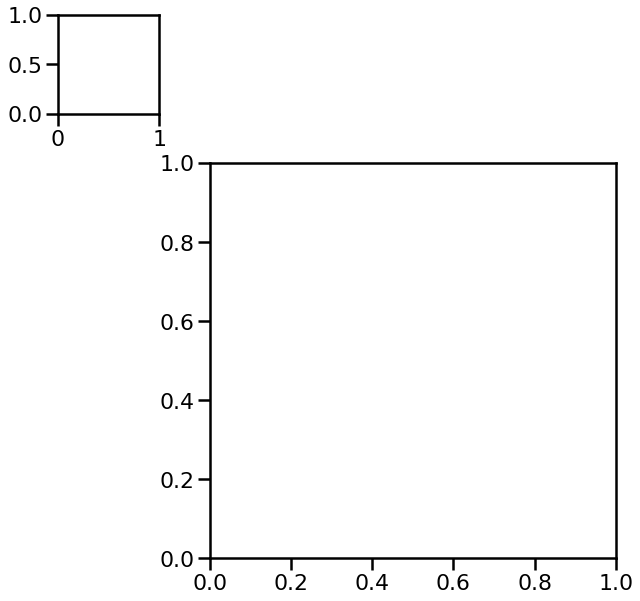

In [128]:
sns.clustermap(data=df)